## Tensor

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
a = torch.tensor([1,2,3], dtype=int)

In [4]:
a

tensor([1, 2, 3])

In [5]:
a.dtype

torch.int64

In [6]:
b = torch.tensor([4,5,6], dtype=float)

In [7]:
b

tensor([4., 5., 6.], dtype=torch.float64)

In [8]:
c = torch.tensor([[1,2,3], [4,5,6]])

In [9]:
c

tensor([[1, 2, 3],
        [4, 5, 6]])

形状

In [10]:
c.shape

torch.Size([2, 3])

In [11]:
c.size()

torch.Size([2, 3])

维度

In [12]:
c.ndim

2

### 数据生成
生成权重为1矩阵

In [13]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

生成权重为0矩阵

In [14]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

生成权重为任意数值的矩阵

In [15]:
torch.rand(3,4)

tensor([[0.1952, 0.8062, 0.8930, 0.1670],
        [0.7356, 0.8582, 0.2442, 0.5616],
        [0.4158, 0.9806, 0.8638, 0.7810]])

生成随机整数的矩阵

In [16]:
torch.randint(0,10,(2,3))

tensor([[6, 6, 9],
        [9, 3, 4]])

生成符合标准正态分布的矩阵

In [17]:
torch.randn(3,4)

tensor([[ 0.1767,  1.2047,  0.9073, -1.0490],
        [-1.4241,  1.3643,  0.5162, -0.4709],
        [ 0.0731,  1.2157, -1.9783, -0.3737]])

生成形状相同的矩阵

In [18]:
a = torch.tensor([[1,2],[3,4],[5,6]])
b = torch.rand_like(a, dtype=float)
b

tensor([[0.2065, 0.2495],
        [0.9404, 0.2873],
        [0.5936, 0.7605]], dtype=torch.float64)

修改数据形状

In [19]:
c = b.view(6)
c

tensor([0.2065, 0.2495, 0.9404, 0.2873, 0.5936, 0.7605], dtype=torch.float64)

In [20]:
d = c.view(2,3)
d

tensor([[0.2065, 0.2495, 0.9404],
        [0.2873, 0.5936, 0.7605]], dtype=torch.float64)

tensor -> python number

In [21]:
c[2]

tensor(0.9404, dtype=torch.float64)

In [22]:
c[2].item()

0.9403929082492163

In [23]:
np.array(c)

array([0.20648057, 0.24950592, 0.94039291, 0.28731879, 0.59359783,
       0.76053577])

python number -> tensor

In [24]:
array = np.array([1,2,3])
array

array([1, 2, 3])

In [25]:
tensor = torch.tensor(array)
tensor

tensor([1, 2, 3])

### 基本运算操作

In [26]:
a = torch.randint(1,5,(2,3))
b = torch.randint(1,5,(2,3))
print(a)
print(b)

tensor([[4, 4, 3],
        [4, 3, 1]])
tensor([[1, 1, 3],
        [3, 3, 3]])


加法

In [27]:
a+b

tensor([[5, 5, 6],
        [7, 6, 4]])

In [28]:
torch.add(a,b)

tensor([[5, 5, 6],
        [7, 6, 4]])

In [29]:
result = torch.zeros(2,3)
torch.add(a,b,out=result)
result

tensor([[5., 5., 6.],
        [7., 6., 4.]])

任何使张量 tensor 发生变化的操作都有一个下划线前缀
- a.add_()
- b.sub_()

In [30]:
a.add_(b)

tensor([[5, 5, 6],
        [7, 6, 4]])

减法

In [31]:
a = torch.randint(1,5,(2,3))
b = torch.randint(1,5,(2,3))
print(a)
print(b)

tensor([[3, 3, 3],
        [1, 1, 3]])
tensor([[1, 1, 2],
        [3, 2, 4]])


In [32]:
a-b

tensor([[ 2,  2,  1],
        [-2, -1, -1]])

乘法，对应位置相乘，两者形状必须相同

In [33]:
a * b

tensor([[ 3,  3,  6],
        [ 3,  2, 12]])

取余

In [34]:
a % b

tensor([[0, 0, 1],
        [1, 1, 3]])

取整

In [35]:
a // b

tensor([[3, 3, 1],
        [0, 0, 0]])

矩阵乘法

In [36]:
a = torch.randint(1,5,(2,3))
b = torch.randint(1,5,(3,5))
print(a)
print(b)

tensor([[4, 4, 4],
        [3, 4, 1]])
tensor([[4, 2, 1, 2, 2],
        [3, 2, 1, 3, 3],
        [1, 2, 4, 1, 1]])


In [37]:
c = torch.matmul(a, b)
c

tensor([[32, 24, 24, 24, 24],
        [25, 16, 11, 19, 19]])

转秩

In [38]:
c.T

tensor([[32, 25],
        [24, 16],
        [24, 11],
        [24, 19],
        [24, 19]])

In [39]:
c

tensor([[32, 24, 24, 24, 24],
        [25, 16, 11, 19, 19]])

求和

In [40]:
torch.sum(c)

tensor(218)

最大最小

In [41]:
torch.max(c)

tensor(32)

In [42]:
torch.min(c)

tensor(11)

最大最小所在的位置

In [43]:
torch.argmax(c)

tensor(0)

In [44]:
torch.argmin(c)

tensor(7)

均值

In [45]:
torch.mean(c.float())

tensor(21.8000)

中位数

In [46]:
torch.median(c)

tensor(24)

平方

In [47]:
c ** 2

tensor([[1024,  576,  576,  576,  576],
        [ 625,  256,  121,  361,  361]])

开方

In [48]:
torch.sqrt(c)

tensor([[5.6569, 4.8990, 4.8990, 4.8990, 4.8990],
        [5.0000, 4.0000, 3.3166, 4.3589, 4.3589]])

### 自动求导

In [49]:
x = torch.ones((2,2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

$$y = 3(x+2)^2 $$
反向传播 $$y' = \frac{3}{2}(x+2)$$ 不是乘2而是除2，因为反向

In [50]:
y = 3 *  (x + 2) **2
y

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

In [51]:
out = y.mean()
out.backward()

In [52]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [53]:
x1 = torch.tensor([[1,1],[1,1]], requires_grad=True, dtype=float)
x1

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64, requires_grad=True)

In [54]:
z1 = torch.pow(x1,2)
z1

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64, grad_fn=<PowBackward0>)

In [55]:
z1.mean().backward()

In [56]:
print(x1.grad)

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]], dtype=torch.float64)


### 线性回归

生成数据

In [57]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01, x_data.shape)
y_data = x_data * 0.1 + 0.2 + noise

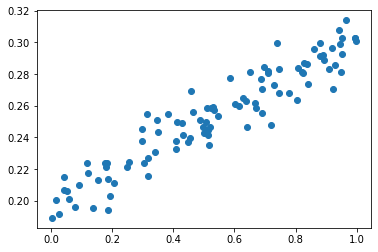

In [58]:
plt.scatter(x_data, y_data)
plt.show()

#### 用之前学过的 sklearn

In [59]:
from sklearn.linear_model import LinearRegression as LR

In [60]:
x_ = x_data.reshape(-1,1)

In [61]:
lrl1 = LR()
lrl1.fit(x_,y_data)
lrl1.coef_

array([0.10324881])

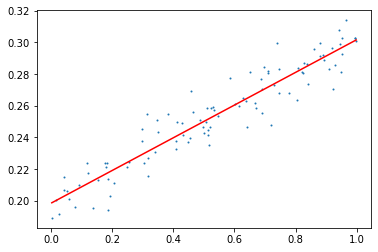

In [62]:
plt.scatter(x_data, y_data, s=1)
plt.plot([min(x_data), max(x_data)], [lrl1.predict(min(x_data).reshape(1,-1)), lrl1.predict(max(x_data).reshape(1,-1))], 'r-')
plt.show()

#### pytorch

In [63]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

转成tensor

In [64]:
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

In [65]:
inputs = Variable(x_data)
target = Variable(y_data)

构建模型

一般把网络中具有可以学习系参数的层放到 __init__() 中

In [66]:
class LinearR(nn.Module):
    def __init__(self):
        super(LinearR, self).__init__()
        self.fc = nn.Linear(1,1)
    def forward(self, x):
        out = self.fc(x)
        return out  

实例化模型

In [67]:
model = LinearR()

损失函数

In [68]:
mse_loss = nn.MSELoss()

优化器

In [69]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [70]:
for name, parameters in model.named_parameters():
    print('name -> {}, param -> {}'.format(name, parameters))

name -> fc.weight, param -> Parameter containing:
tensor([[-0.2948]], requires_grad=True)
name -> fc.bias, param -> Parameter containing:
tensor([-0.0902], requires_grad=True)


In [71]:
for i in range(1001):
    out = model(inputs)
    loss = mse_loss(out, target)
    # 梯度清零
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 200 == 0:
        print(i, loss.item())

0 0.2649146020412445
200 0.00012215350579936057
400 0.00010675763769540936
600 0.000106666142528411
800 0.00010666566231520846
1000 0.00010666560410754755


In [72]:
y_pred = model(inputs)

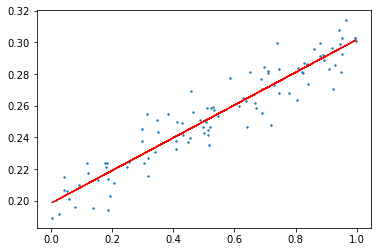

In [73]:
plt.scatter(x_data, y_data, s=2)
plt.plot(x_data, y_pred.data.numpy(), 'r-', lw=1)
plt.show()

### 非线性回归

In [74]:
x_nolinear = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_nolinear.shape)
y_nolinear = np.square(x_nolinear) + noise

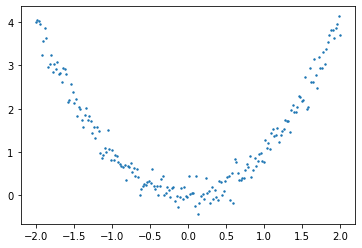

In [75]:
plt.scatter(x_nolinear, y_nolinear, s=2)
plt.show()

#### 传统机器学习
- SVR
- Kernal Ridge

In [76]:
from sklearn.svm import SVR

In [77]:
lrl2 = SVR()
lrl2.fit(x_nolinear,y_nolinear)

SVR()

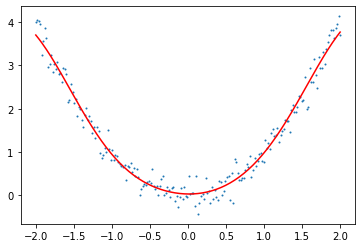

In [78]:
plt.scatter(x_nolinear, y_nolinear, s=1)
plt.plot(x_nolinear, lrl2.predict(x_nolinear), 'r-')
plt.show()

In [79]:
from sklearn import kernel_ridge

In [80]:
lrl3 = kernel_ridge.KernelRidge(kernel='poly', degree=2)
lrl3.fit(x_nolinear,y_nolinear)

KernelRidge(degree=2, kernel='poly')

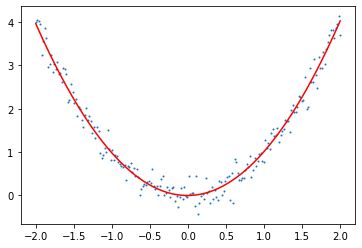

In [81]:
plt.scatter(x_nolinear, y_nolinear, s=1)
plt.plot(x_nolinear, lrl3.predict(x_nolinear), 'r-')
plt.show()

#### pytorch

In [82]:
class noLinearR(nn.Module):
    def __init__(self):
        super(noLinearR, self).__init__()
        # 1-10-1
        self.fc1 = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [83]:
model1 = noLinearR()
mes_loss = nn.MSELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.3)

In [84]:
inputs = Variable(torch.FloatTensor(x_nolinear))
target = Variable(torch.FloatTensor(y_nolinear))

In [85]:
for i in range(2001):
    out = model1(inputs)
    loss = mes_loss(out, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 200 == 0:
        print(i, loss.item())

0 4.16954231262207
200 0.1527414172887802
400 0.06649401038885117
600 0.09761138260364532
800 0.05927461013197899
1000 0.0687788724899292
1200 0.06948471814393997
1400 0.06762362271547318
1600 0.06612688302993774
1800 0.06509360671043396
2000 0.06433359533548355


In [86]:
y_pred = model1(inputs)

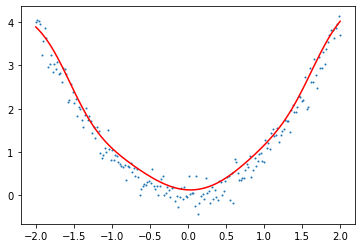

In [87]:
plt.scatter(x_nolinear, y_nolinear, s=1)
plt.plot(x_nolinear, y_pred.data.numpy(), 'r-')
plt.show()